In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [13]:
np.array([1, 2, 3, 4, 5])[:r(3)]

array([1, 2, 3, 4, 5])

In [7]:
def feature_extraction0(img: np.ndarray) -> np.ndarray:
    # Convert to grayscale
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Detect corners
    corners = cv.goodFeaturesToTrack(gray, 100, 0.01, 10)
    # Draw corners
    corners = corners.astype(np.intp) # np.int0(corners)
    for i in corners:
        x, y = i.ravel()
        cv.circle(img, (x, y), 3, 255, -1)
    return img

In [14]:
img = cv.imread('example/1.jpg')

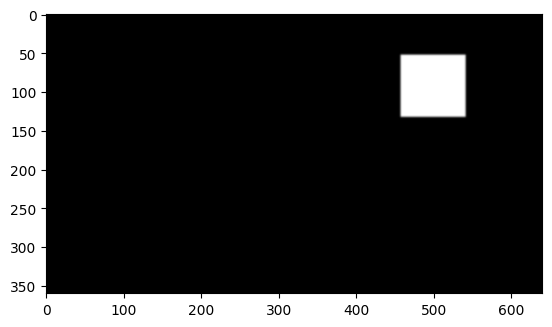

In [84]:
# Convert to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY).astype(np.int16)
gray = cv.resize(gray, None, fx = 0.5, fy = 0.5, interpolation = cv.INTER_AREA)
# clear noise
gray = cv.GaussianBlur(gray, (5, 5), 0)

# plot
plt.imshow(gray, cmap='gray')
plt.show()

In [92]:
def pos(x): return x if x > 0 else None


def neg(x): return x if x < 0 else None

In [ ]:
w_size = 11
offset = w_size//2
uvs = [(u - offset, v-offset) for u in range(w_size) for v in range(w_size)]

In [93]:
R = np.zeros((gray.shape[0], gray.shape[1]), dtype=np.int32)

for w_size in [5, 11, 21]:
    offset = w_size//2
    uvs = [(u - offset, v-offset) for u in range(w_size) for v in range(w_size)]
    # Compute the response of the detector at each pixel
    R_ = np.zeros((gray.shape[0], gray.shape[1]), dtype=np.int32)
    for u, v in uvs:
        R_[pos(u):neg(u), pos(v):neg(v)] += (gray[pos(u):neg(u), pos(v):neg(v)] - gray[pos(-u):neg(-u), pos(-v):neg(-v)])**2
    R_ = R_ / len(uvs)
    R = np.maximum(R, R_)


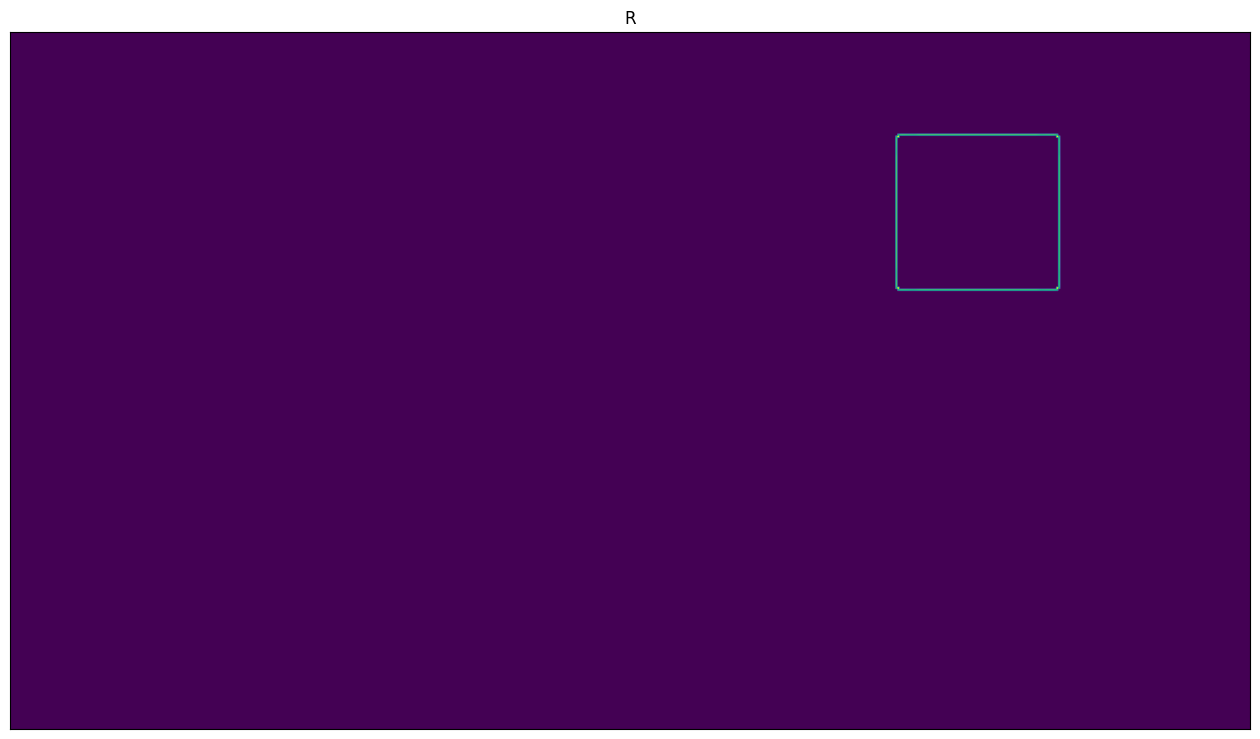

In [101]:
R2 = R * (R > 10000)

# plot
plt.imshow(R2)
plt.title('R'), plt.xticks([]), plt.yticks([])
plt.gcf().set_size_inches(16, 10)
plt.show()

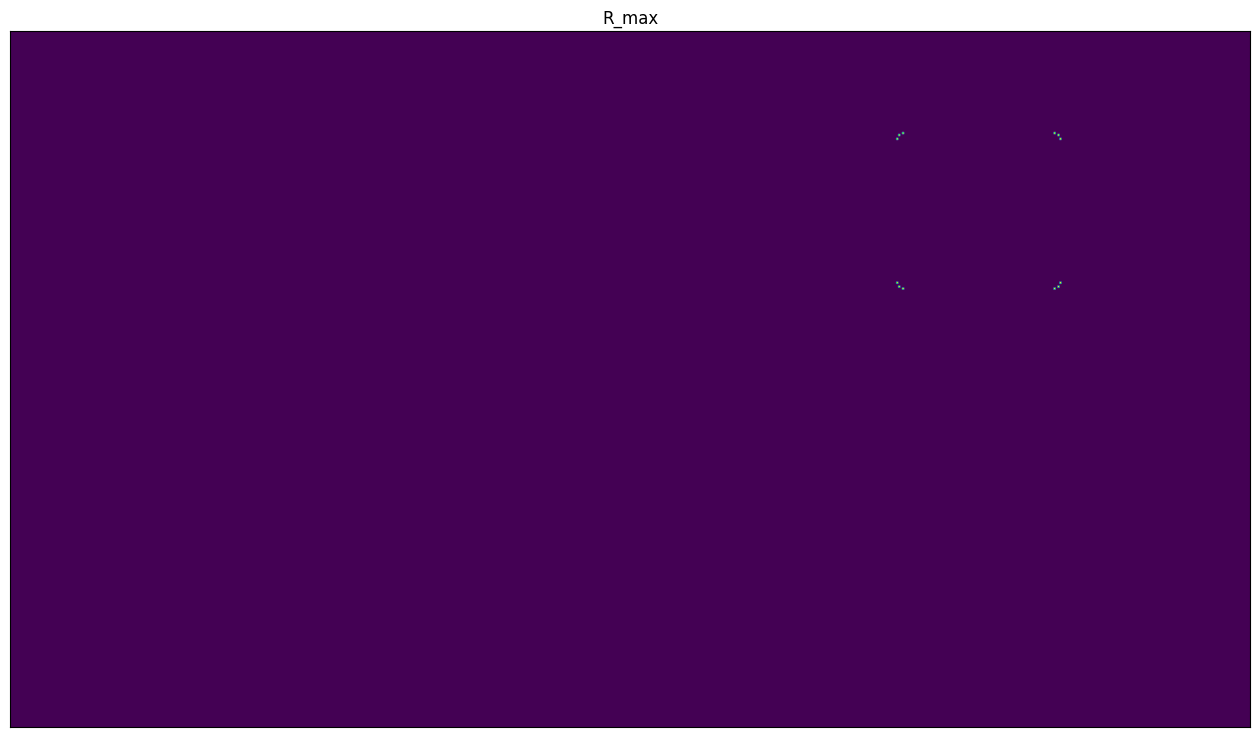

In [102]:
# get loacl maxima
R_max = np.zeros((R2.shape[0]-2, R2.shape[1]-2), dtype=R2.dtype)

R_max[:,:] = R2[1:-1, 1:-1] > R2[:-2, :-2]
R_max[:,:] *= R2[1:-1, 1:-1] > R2[:-2, 1:-1]
R_max[:,:] *= R2[1:-1, 1:-1] > R2[:-2, 2:]
R_max[:,:] *= R2[1:-1, 1:-1] > R2[1:-1, :-2]
R_max[:,:] *= R2[1:-1, 1:-1] > R2[1:-1, 2:]
R_max[:,:] *= R2[1:-1, 1:-1] > R2[2:, :-2]
R_max[:,:] *= R2[1:-1, 1:-1] > R2[2:, 1:-1]
R_max[:,:] *= R2[1:-1, 1:-1] > R2[2:, 2:]

# plot
plt.imshow(R_max)
plt.title('R_max'), plt.xticks([]), plt.yticks([])

plt.gcf().set_size_inches(16, 10)
plt.show()

In [103]:
corners = np.argwhere(R_max)
corners

array([[ 52, 459],
       [ 52, 537],
       [ 53, 457],
       [ 53, 539],
       [ 55, 456],
       [ 55, 540],
       [129, 456],
       [129, 540],
       [131, 457],
       [131, 539],
       [132, 459],
       [132, 537]], dtype=int64)

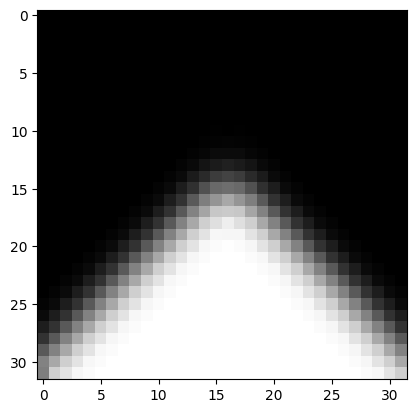

In [163]:
def rotate_patch(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    b = int(abs(round(32 * np.sin(np.deg2rad(angle)))))
    c = int(abs(round(32 * np.cos(np.deg2rad(angle)))))
    ratio = ((b+c) / 32)
    rot_mat = cv.getRotationMatrix2D(image_center, angle, ratio)
    result = cv.warpAffine(
        image, rot_mat, (32,32), flags=cv.INTER_LINEAR)
    return result

plt.imshow(rotate_patch(gray[38:38+32,442:442+32], -45)[:32,:32], cmap='gray')
plt.show()

In [ ]:


blurred = cv.pyrDown(cv.pyrDown(gray))

# build descriptor for each corner
descriptors = []
for x, y in corners:
    # find the gradient of 8*8 window
    dx = blurred[x+1, y] - blurred[x-1, y]
    dy = blurred[x, y+1] - blurred[x, y-1]
    
    # take a 32*32 window around the corner with the direction of the gradient
    # and compute the histogram of the gradient
    cv.rotate(blurred[x-16:x+16, y-16:y+16])
    

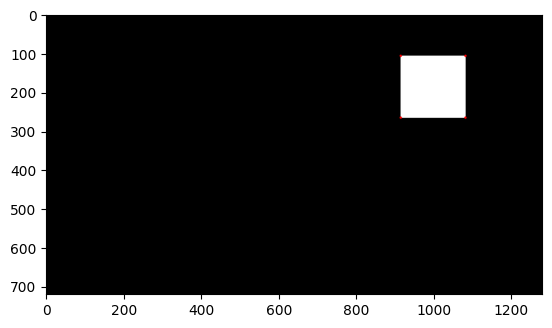

In [6]:
my_im = cv.imread('example/1.jpg')
my_im = feature_extraction0(my_im)
plt.imshow(my_im)
plt.show()